# Production Model

 - [Import Data](#Import-Data)
 - [Models Metric Summary](#Models-Metric-Summary)
 - [Test F1 Score and Recall Score from Best Models](#Test-F1-Score-and-Recall-Score-from-Best-Models)
 - [Production Model: Model 12](#Production-Model:-Model-12)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display

## Import Data

In [11]:
results_df2 = pd.read_csv('../data/results_df2.csv', index_col = [0])

## Models Metric Summary 

In [12]:
results_df2.describe()

,train_accuracy,val_accuracy,test_accuracy,train_precision,val_precision,test_precision,train_recall,val_recall,test_recall
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,0.790600,0.538744,0.464183,0.858550,0.584578,0.495817,0.698894,0.456878,0.414483
std,0.174031,0.125110,0.271043,0.132119,0.144718,0.286093,0.256979,0.174374,0.259194
min,0.487200,0.302600,0.000000,0.582000,0.300000,0.000000,0.253200,0.118400,0.000000
25%,0.655425,0.453975,0.404625,0.779175,0.481950,0.481950,0.482400,0.335525,0.289500
50%,0.777250,0.559200,0.578950,0.879550,0.604550,0.602650,0.658650,0.486850,0.486850
75%,0.971975,0.605300,0.625025,0.982075,0.680275,0.679600,0.966300,0.578950,0.602000
max,1.000000,0.750000,0.750000,1.000000,0.833300,0.772700,1.000000,0.750000,0.750000


In [13]:
results_df2

,Model,train_accuracy,val_accuracy,test_accuracy,train_precision,val_precision,test_precision,train_recall,val_recall,test_recall
0,baseline,0.8846,0.5526,0.5526,0.9013,0.5467,0.5467,0.8782,0.5395,0.5395
1,model_1,1.0000,0.6053,0.6053,1.0000,0.6053,0.6053,1.0000,0.6053,0.6053
2,model_2,0.9744,0.5921,0.5921,0.9837,0.6000,0.6000,0.9679,0.5921,0.5921
3,model_3,0.5801,0.4737,0.4737,0.5820,0.4800,0.4800,0.5801,0.4737,0.4737
4,model_4,0.6603,0.5658,0.5658,0.7706,0.6129,0.6129,0.5385,0.5000,0.5000
5,model_5,0.6186,0.3816,0.3816,0.7543,0.4878,0.4878,0.4231,0.2632,0.2632
6,model_6,1.0000,0.6579,0.6579,1.0000,0.6757,0.6757,1.0000,0.6579,0.6579
7,model_7,0.9872,0.7500,0.7500,0.9871,0.7703,0.7703,0.9840,0.7500,0.7500
8,model_8,0.6538,0.3816,0.0000,0.8136,0.4286,0.0000,0.4615,0.1974,0.0000
9,model_9,0.9936,0.3684,0.0000,0.9935,0.3636,0.0000,0.9872,0.3158,0.0000


Max unweighted test accuracy is 0.750000


Max unweighted test precision is 0.772700


Max unweighted test recall is 0.750000


These unweighted max accuracy, recall and precision test metrics belong to model 7. However, it is important to look at the individual test f1 score and recall score for otitis media as well. Below we will evaluate test f1 score and recall score from the best models.

## Test F1 Score and Recall Score from Best Models 

Models 8-11 were not included. Those were the models that used pretrained models and had extremely unreliable metric scores.

In [14]:
om_test_recall = [0.32, 0.44, 0.56, 0.69, 0.25, 0.50, 0.88, 0.62, 1, 0.31, 0.5, 0.44, 0.75, 0.25]

om_test_f1_score = [0.42, 0.48, 0.53, 0.50, 0.30, 0.33, 0.58, 0.65, 0.91, 0.43, 0.5, 0.56, 0.63, 0.40 ]

recall = pd.DataFrame(om_test_recall, columns = ['test_recall'], index = ['Basic Model', 'Model 1', 'Model 2', 'Model3', 'Model 4', 'Model 5', 'Model 6', 'Model 7', 'Model 12', 'Model 13', 'Model 14', 'Model 15', 'Model 16', 'Model 17'])

f1_score = pd.DataFrame(om_test_f1_score, columns = ['f1_score'], index = ['Basic Model', 'Model 1', 'Model 2', 'Model 3', 'model 4', 'Model 5', 'Model 6', 'Model 7', 'Model 12', 'Model 13', 'Model 14', 'Model 15', 'Model 16', 'Model 17'])

scores_best_models = pd.merge(left = recall, right = f1_score, how = 'inner', right_index = True, left_index = True )

scores_best_models

,test_recall,f1_score
Basic Model,0.32,0.42
Model 1,0.44,0.48
Model 2,0.56,0.53
Model 5,0.50,0.33
Model 6,0.88,0.58
Model 7,0.62,0.65
Model 12,1.00,0.91
Model 13,0.31,0.43
Model 14,0.50,0.50
Model 15,0.44,0.56


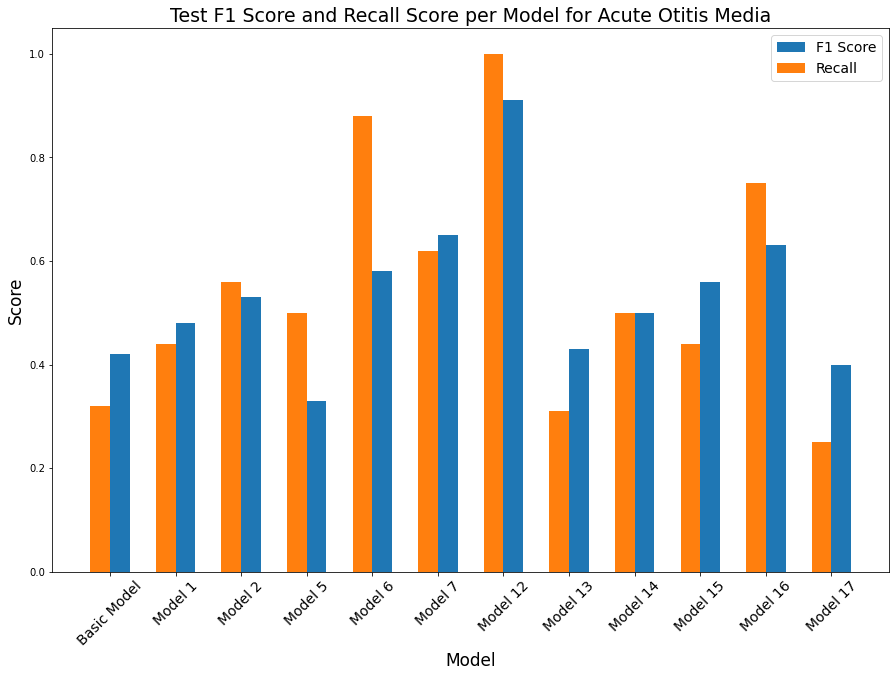

In [15]:
plt.figure(figsize = (15,10))
plt.title('Test F1 Score and Recall Score per Model for Acute Otitis Media', fontsize = 19)
plt.xlabel('Model', fontsize = 17)
plt.ylabel('Score', fontsize = 17);
plt.xticks( rotation=45, fontsize = 14)
plt.bar(scores_best_models.index , height = scores_best_models['f1_score'], align='edge', width=0.3, label='F1 Score')
plt.bar(scores_best_models.index , height = scores_best_models['test_recall'], align='edge', width=-0.3, label='Recall')
plt.legend(fontsize = 14);

When looking at recall and f1 sore for otitis media for the test set of the best models, model 12 has the highest recall score of 1 and highest f1 score at 0.91. Model 6 and model 16 both have high test recall anad f1 scores for otitis media with model 6 having a recall score of 0.88 and f1 score of 0.58. Model 16 had a recall score for otitis media of 0.75 and f1 score of 0.63. 


Even though model 7 has the highest unweighted max accuracy, recall and precision test metrics, model 7s test otitis media recall and f1 scores were not has high as model 6,16, or 12. It is important to prioritize otitis media recall and f1 score for test set since we want to reduce the amount of false negative and limit false positives as well. Also, the max unweighted accuracy, recall and precision might be misleading since the dataset is unbalanced. 

Overall, we would want a model that reduces false negatives and false positive for otitis media. Model 12 and model 16 have the best over all test metrics when looking at f1 score and recall score for otitis media with model 12 with the overall highest test recall and f1 scores for otitis media.

In [ ]:
scores_best_models.to_csv('../data/scores_best_models.csv')

## Production Model: Model 12

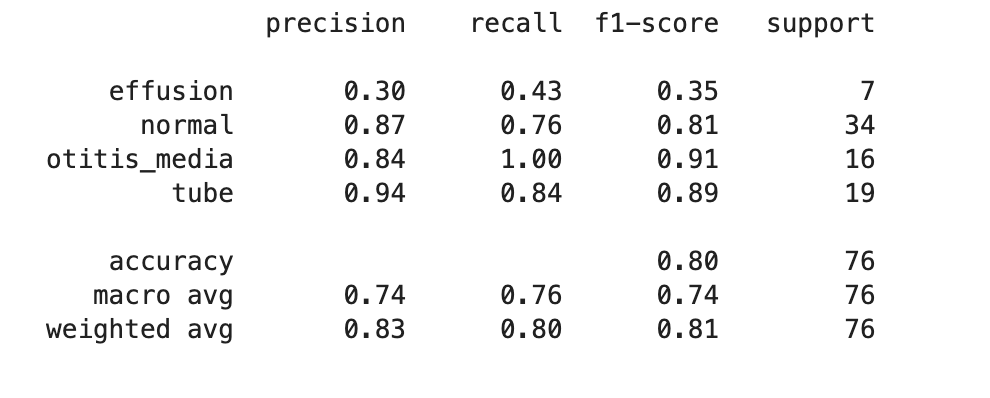

In [16]:
display.Image("../images/confusion_matrix_12.png")

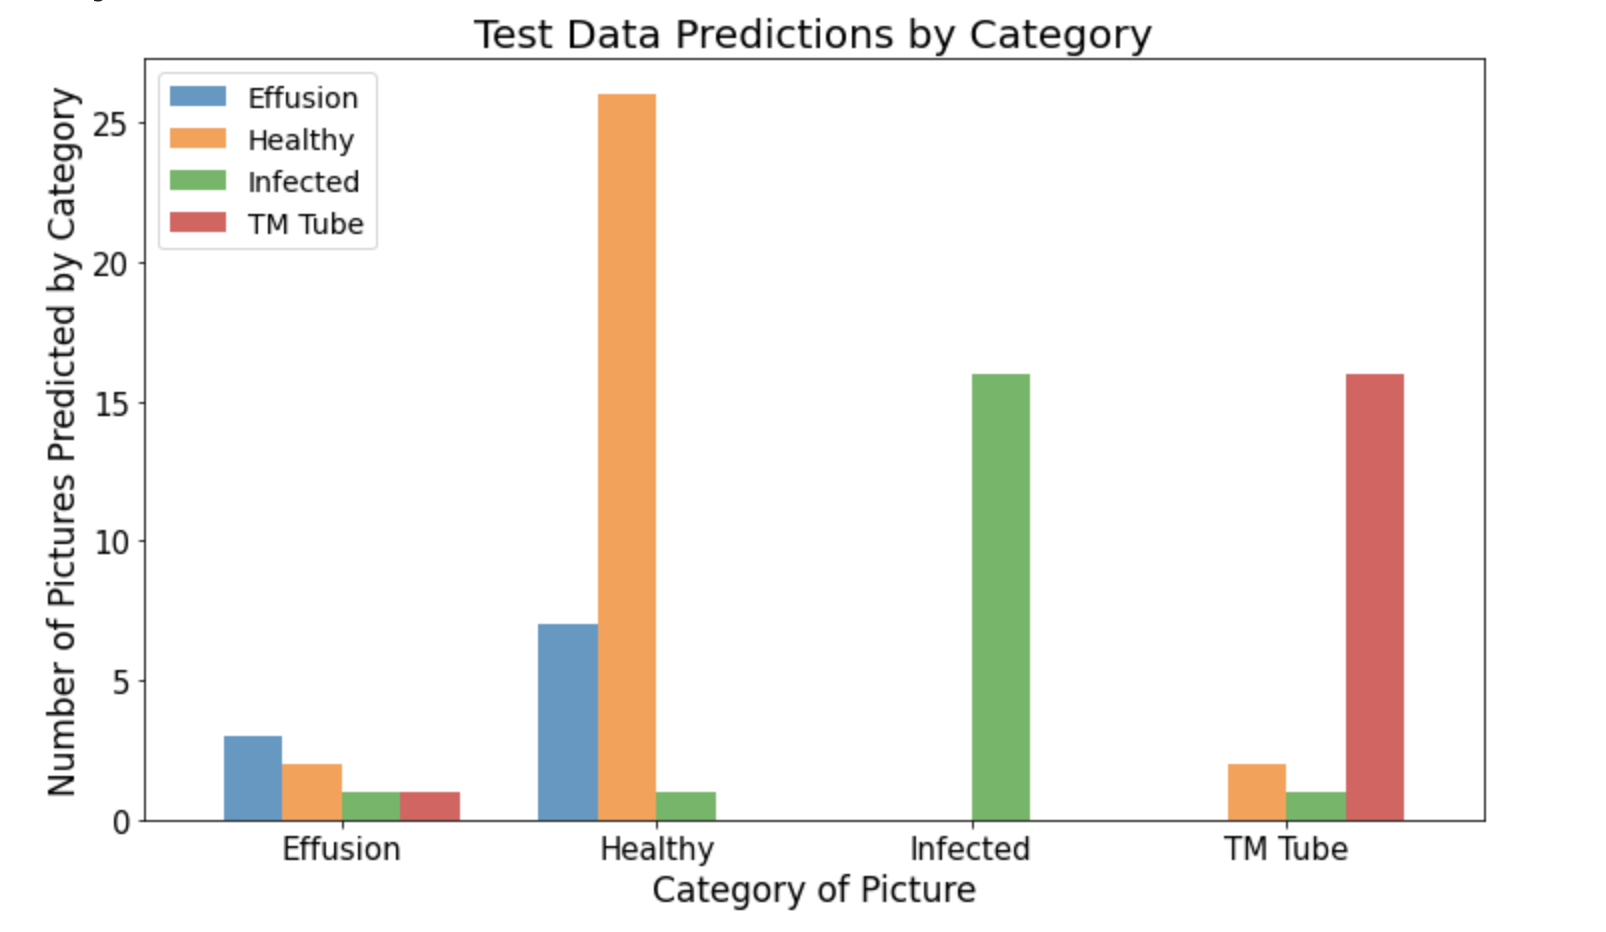

In [17]:
display.Image("../images/test_data_result_model_12.png")

From these two graphs, we can see that model 12 has the highest test otitis media recall score out of the models with a score of 1 and the highest f1 score of 0.91. It is important for this model to reduce type II error or false negative for otitis media. We would not want to wrongly state that someone is not showing signs of infection when they actually are and therefore delay them from seeking proper treatment. This model reduces type II error the most for otitis media and also has am overall weighted accuracy score of 0.8 and an averaged weighted f1 score of 0.81.

This model does very well at classifying normal, otitis media and tube correctly. However, this model struggles with identifying effusion correctly with test effusion precision score of 0.3, test f1 score of 0.35, and test recall score of 0.43. 